In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import yfinance as yf
from yahoofinancials import YahooFinancials as yfs

%matplotlib widget
sns.set_style("darkgrid")
sns.set(font_scale=1.7) 

In [447]:
buy_ticker = "VLY"
sell_ticker = "RCM"

ticker1 = yf.Ticker(buy_ticker)
ticker2 = yf.Ticker(sell_ticker)
dataFrame1 = ticker1.history(
    start='2010-1-1', actions=True, rounding=True)
dataFrame2 = ticker2.history(
    start='2010-1-1', actions=True, rounding=True)

ratio = dataFrame1.Close / dataFrame2.Close
spread = dataFrame1.Close - dataFrame2.Close

In [448]:
ticker1_income_yearly = pd.DataFrame(
    ticker1.financials.T["Net Income Applicable To Common Shares"])
ticker2_income_yearly = pd.DataFrame(
    ticker2.financials.T["Net Income Applicable To Common Shares"])
ticker1_income_quartely = pd.DataFrame(
    ticker1.quarterly_financials.T["Net Income Applicable To Common Shares"])
ticker2_income_quartely = pd.DataFrame(
    ticker2.quarterly_financials.T["Net Income Applicable To Common Shares"])


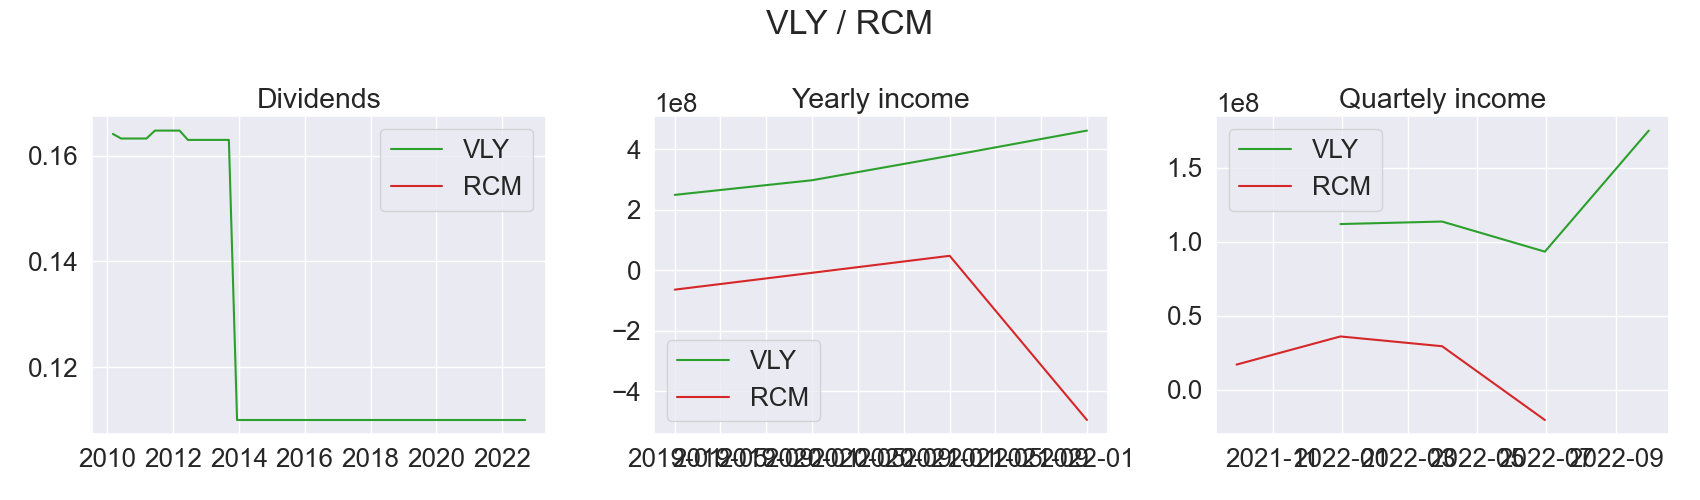

In [449]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))

fig.suptitle(f'{buy_ticker} / {sell_ticker}')
ax1.set_title("Dividends")
ax1.plot(ticker1.dividends, 'tab:green', label=buy_ticker)
ax1.plot(ticker2.dividends, 'tab:red', label=sell_ticker)
ax1.legend()

ax2.set_title("Yearly income")
ax2.plot(ticker1_income_yearly, 'tab:green', label=buy_ticker)
ax2.plot(ticker2_income_yearly, 'tab:red', label=sell_ticker)
ax2.legend()

ax3.set_title("Quartely income")
ax3.plot(ticker1_income_quartely, 'tab:green', label=buy_ticker)
ax3.plot(ticker2_income_quartely, 'tab:red', label=sell_ticker)
ax3.legend()

plt.tight_layout(pad=1)


In [450]:

# Long ticker:
long_p_e = yfs(buy_ticker).get_pe_ratio()
long_div = yfs(buy_ticker).get_dividend_yield()
long_profit = yfs(buy_ticker).get_gross_profit()
# Short ticker:
short_p_e = yfs(sell_ticker).get_pe_ratio()
short_div = yfs(sell_ticker).get_dividend_yield()
short_profit = yfs(sell_ticker).get_gross_profit()
print(
    f"LONG position {buy_ticker} P/E ratio = {long_p_e}, dividend: {long_div}, Gross Profit: {long_profit}")
print(
    f"SHORT position {sell_ticker} P/E ratio = {short_p_e}, dividend: {short_div}, Gross profit: {short_profit}")


LONG position VLY P/E ratio = 11.609524, dividend: 0.0363, Gross Profit: 1321371000
SHORT position RCM P/E ratio = 44.454544, dividend: None, Gross profit: 311800000


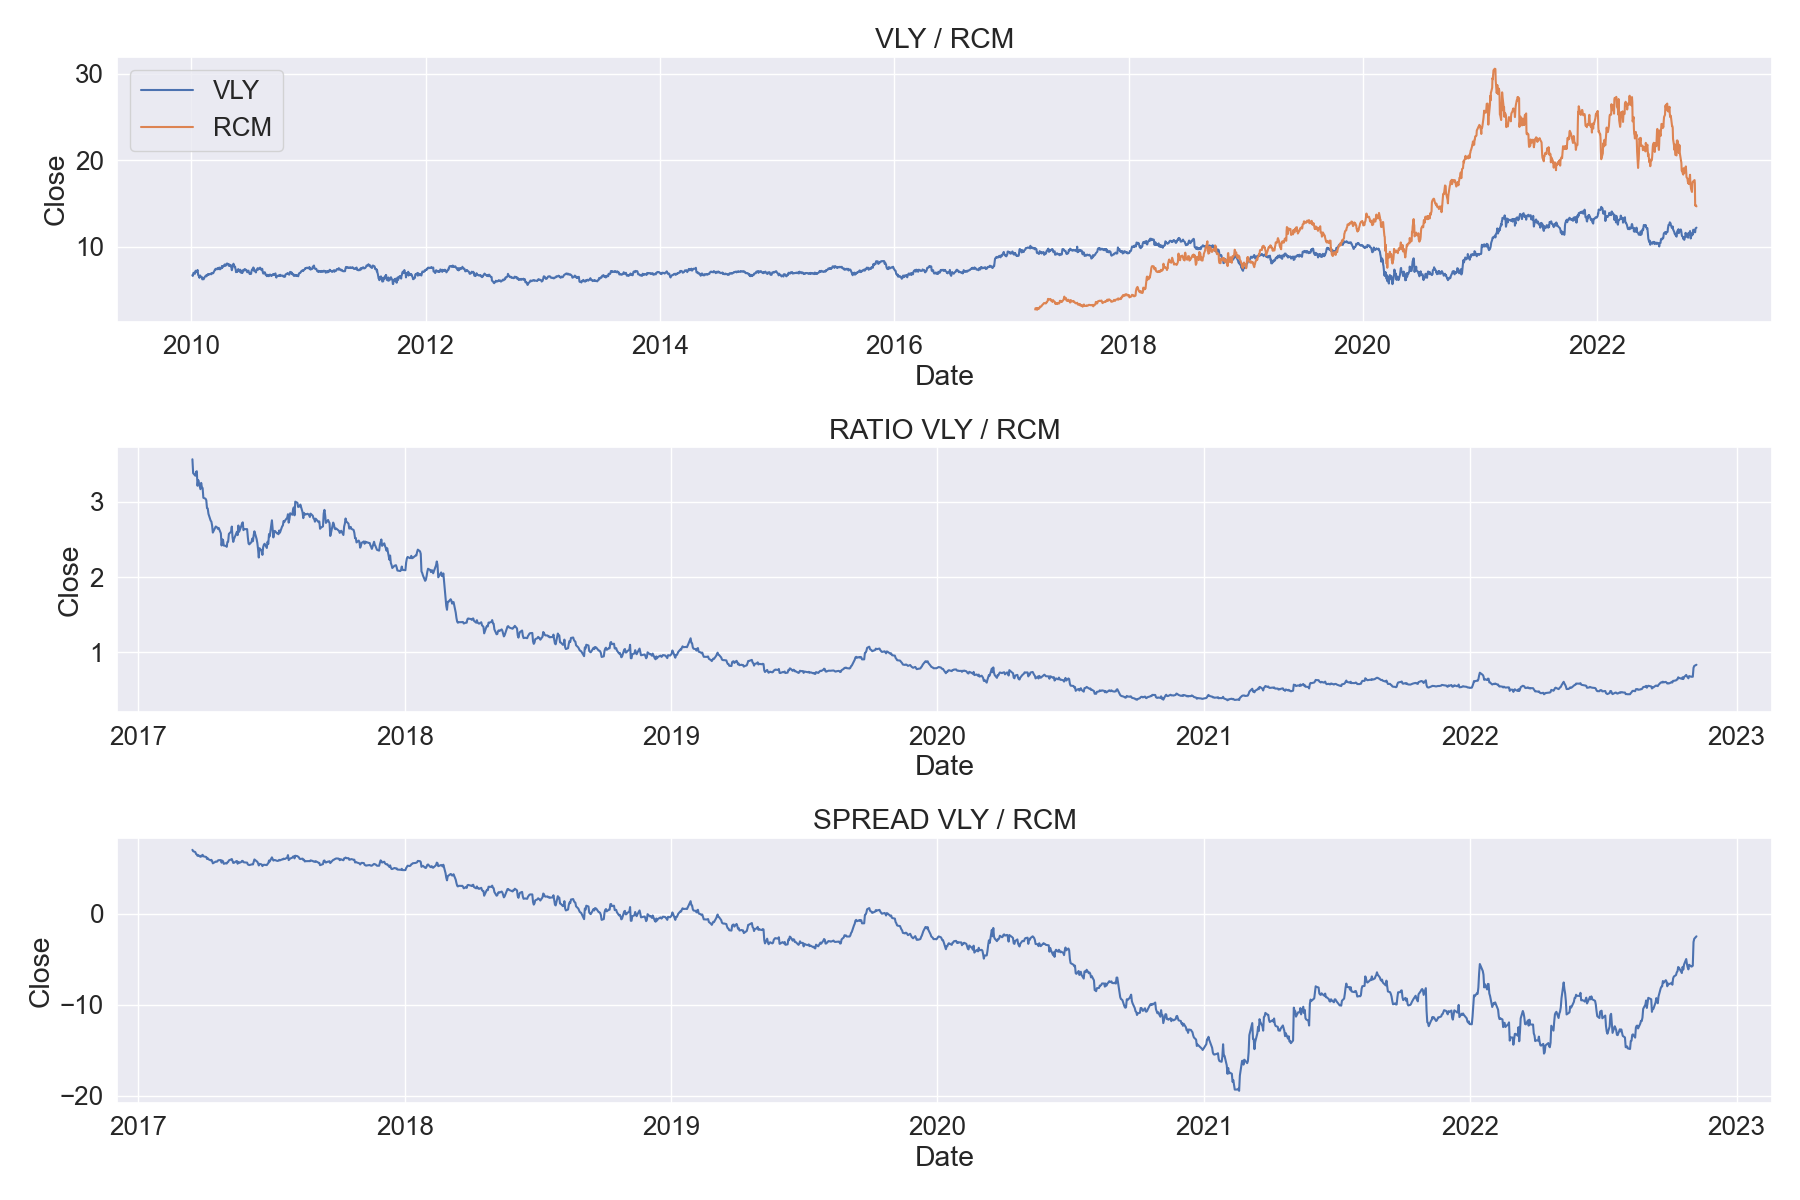

In [451]:
fig, axes = plt.subplots(3, figsize=(18, 12))

axes[0].set_title(f"{buy_ticker} / {sell_ticker}")
sns.lineplot(data=dataFrame1, x="Date", y="Close",
             ax=axes[0], label=buy_ticker)
sns.lineplot(data=dataFrame2, x="Date", y="Close",
             ax=axes[0], label=sell_ticker)

axes[1].set_title(f"RATIO {buy_ticker} / {sell_ticker}")
sns.lineplot(data=ratio, ax=axes[1])

axes[2].set_title(f"SPREAD {buy_ticker} / {sell_ticker}")
sns.lineplot(data=spread, ax=axes[2])


plt.tight_layout(pad=1)
